### Step-1 : Import All Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step-2 : Read the Data

In [7]:
visa_df = pd.read_csv(r'C:\Users\D.JYOTSNA\OneDrive\Documents\Full Stack Data Science\2. DataFiles\Visadataset.csv')
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Step-3 : Divide the data into Categorical and Numerical Data

In [17]:
cat_data = [i for i,j in visa_df.dtypes.to_dict().items() if j == 'object']
num_data = [i for i,j in visa_df.dtypes.to_dict().items() if j != 'object']
cat_data,num_data

(['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

In [23]:
cat_data = visa_df.select_dtypes(include = 'object').columns
num_data = visa_df.select_dtypes(exclude = 'object').columns
cat_data,num_data

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

### Step-4 : How to read the column

In [33]:
cols = ['continent','case_status']
visa_df[cols].head()

,continent,case_status
0,Asia,Denied
1,Asia,Certified
2,Asia,Denied
3,Asia,Denied
4,Africa,Certified


In [41]:
a = list(cat_data).index('case_status')
visa_df.iloc[:,a]

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

## Continent Column Analysis

In [53]:
unique = []
for i in visa_df['continent']:
    if i not in unique:
        unique.append(i)

In [55]:
unique

['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']

In [57]:
count = []
for i in unique:
    con = visa_df['continent'] == i
    count.append(len(visa_df[con]))
count

[16861, 551, 3292, 3732, 852, 192]

In [63]:
df = pd.DataFrame(zip(unique,count)).rename({0:'Continent',1:'Count'}, axis = 1)
df

,Continent,Count
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


In [67]:
keys = visa_df['continent'].value_counts().keys()
value = visa_df['continent'].value_counts().values
keys,value

(Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
        'Oceania'],
       dtype='object', name='continent'),
 array([16861,  3732,  3292,   852,   551,   192], dtype=int64))

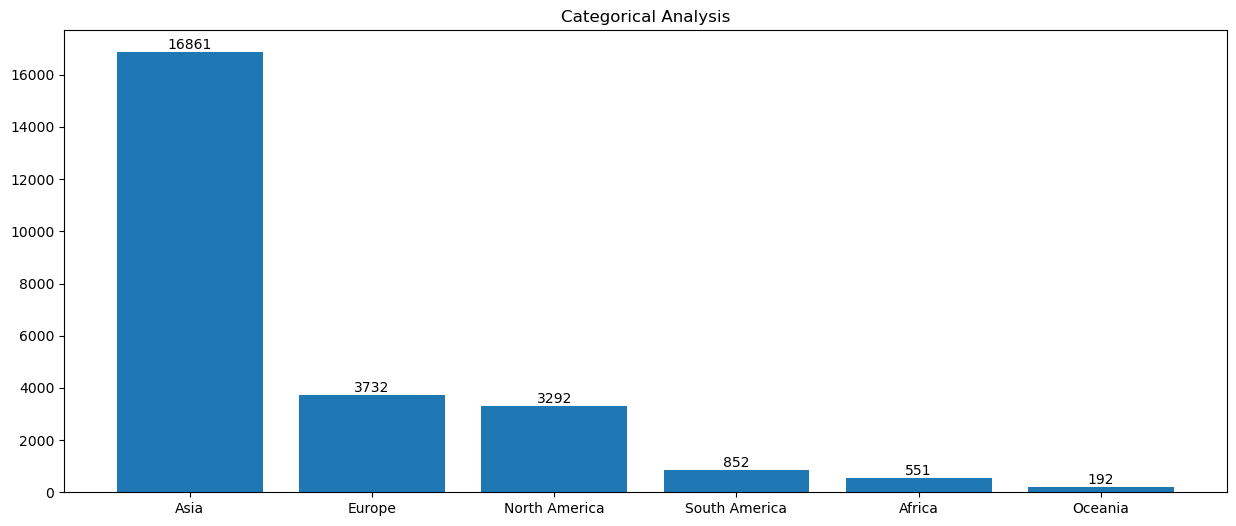

In [69]:
plt.figure(figsize = (15,6))
plt.title('Categorical Analysis')
bar = plt.bar(keys,value)
plt.bar_label(bar)
plt.show()

## Bar Graph of All Categorical Columns

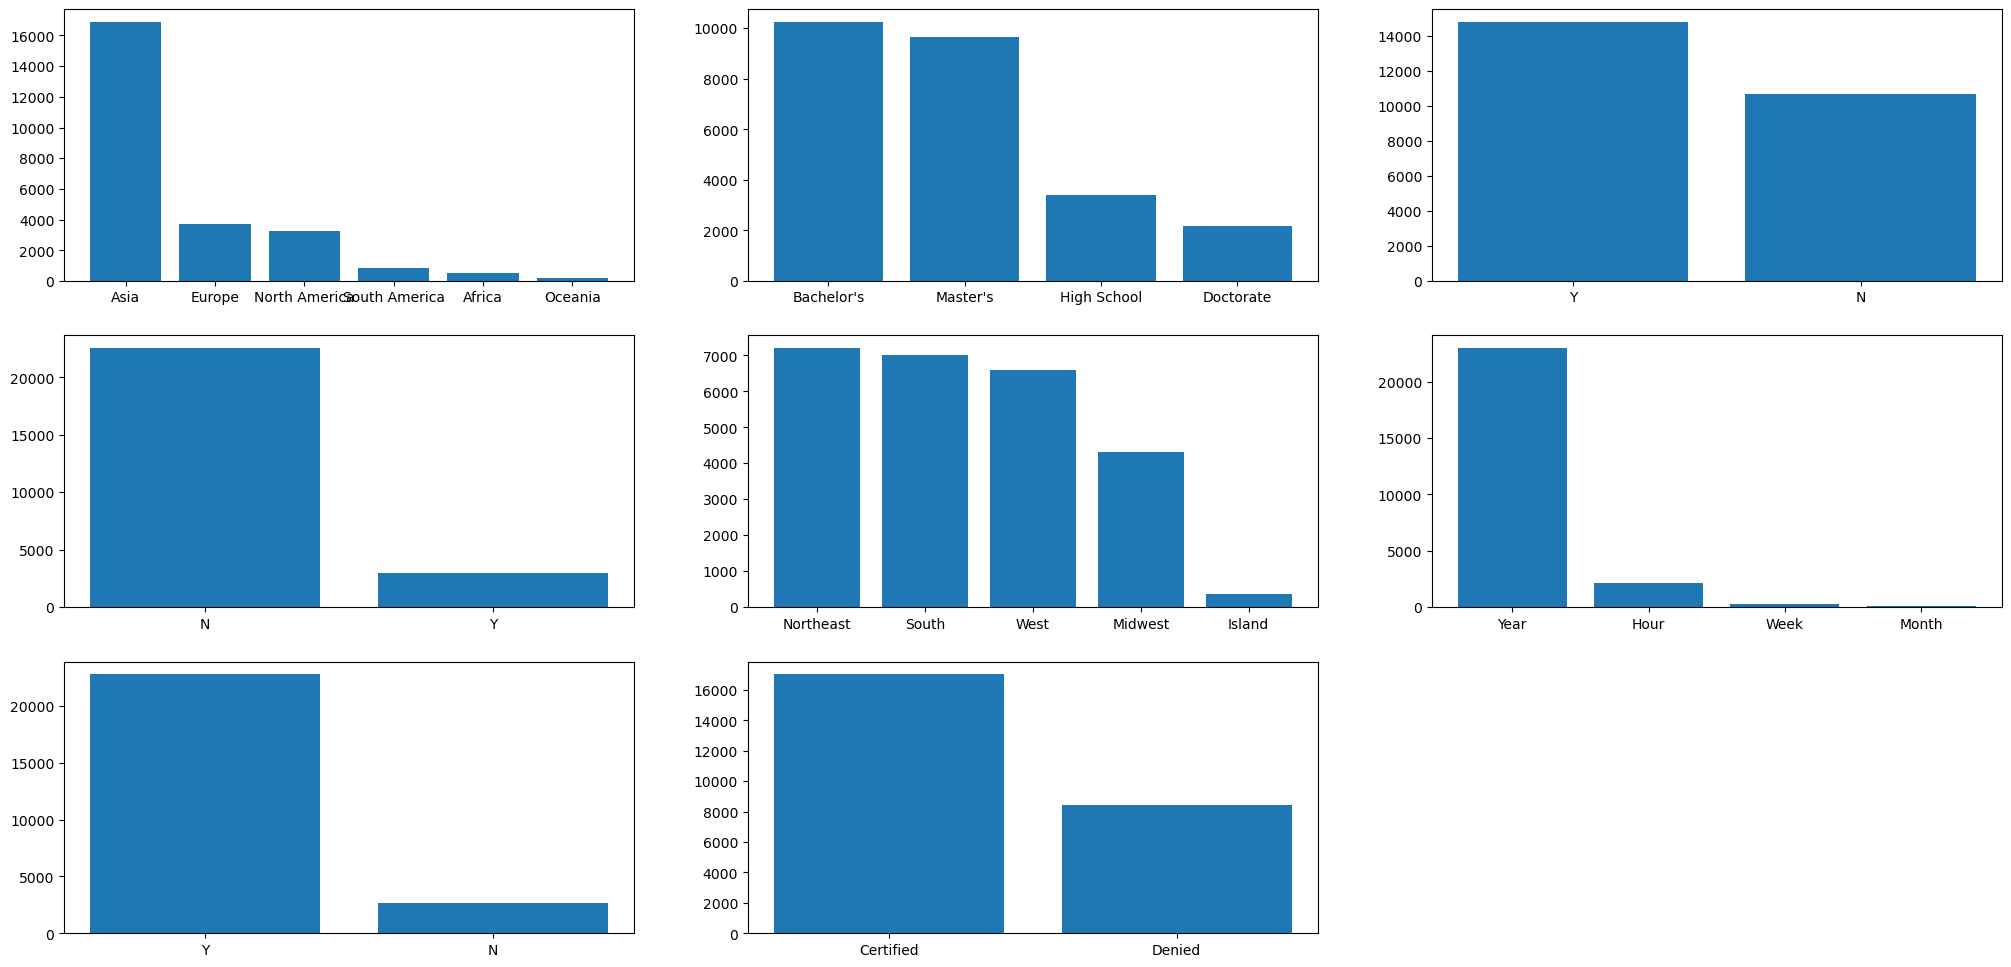

In [150]:
cat_data = visa_df.select_dtypes(include = 'object').columns
plt.figure(figsize = (25,12))
for i in range(1,len(cat_data)):
    keys = visa_df[cat_data[i]].value_counts().keys()
    value = visa_df[cat_data[i]].value_counts().values
    plt.subplot(3,3,i)
    plt.bar(keys,value)

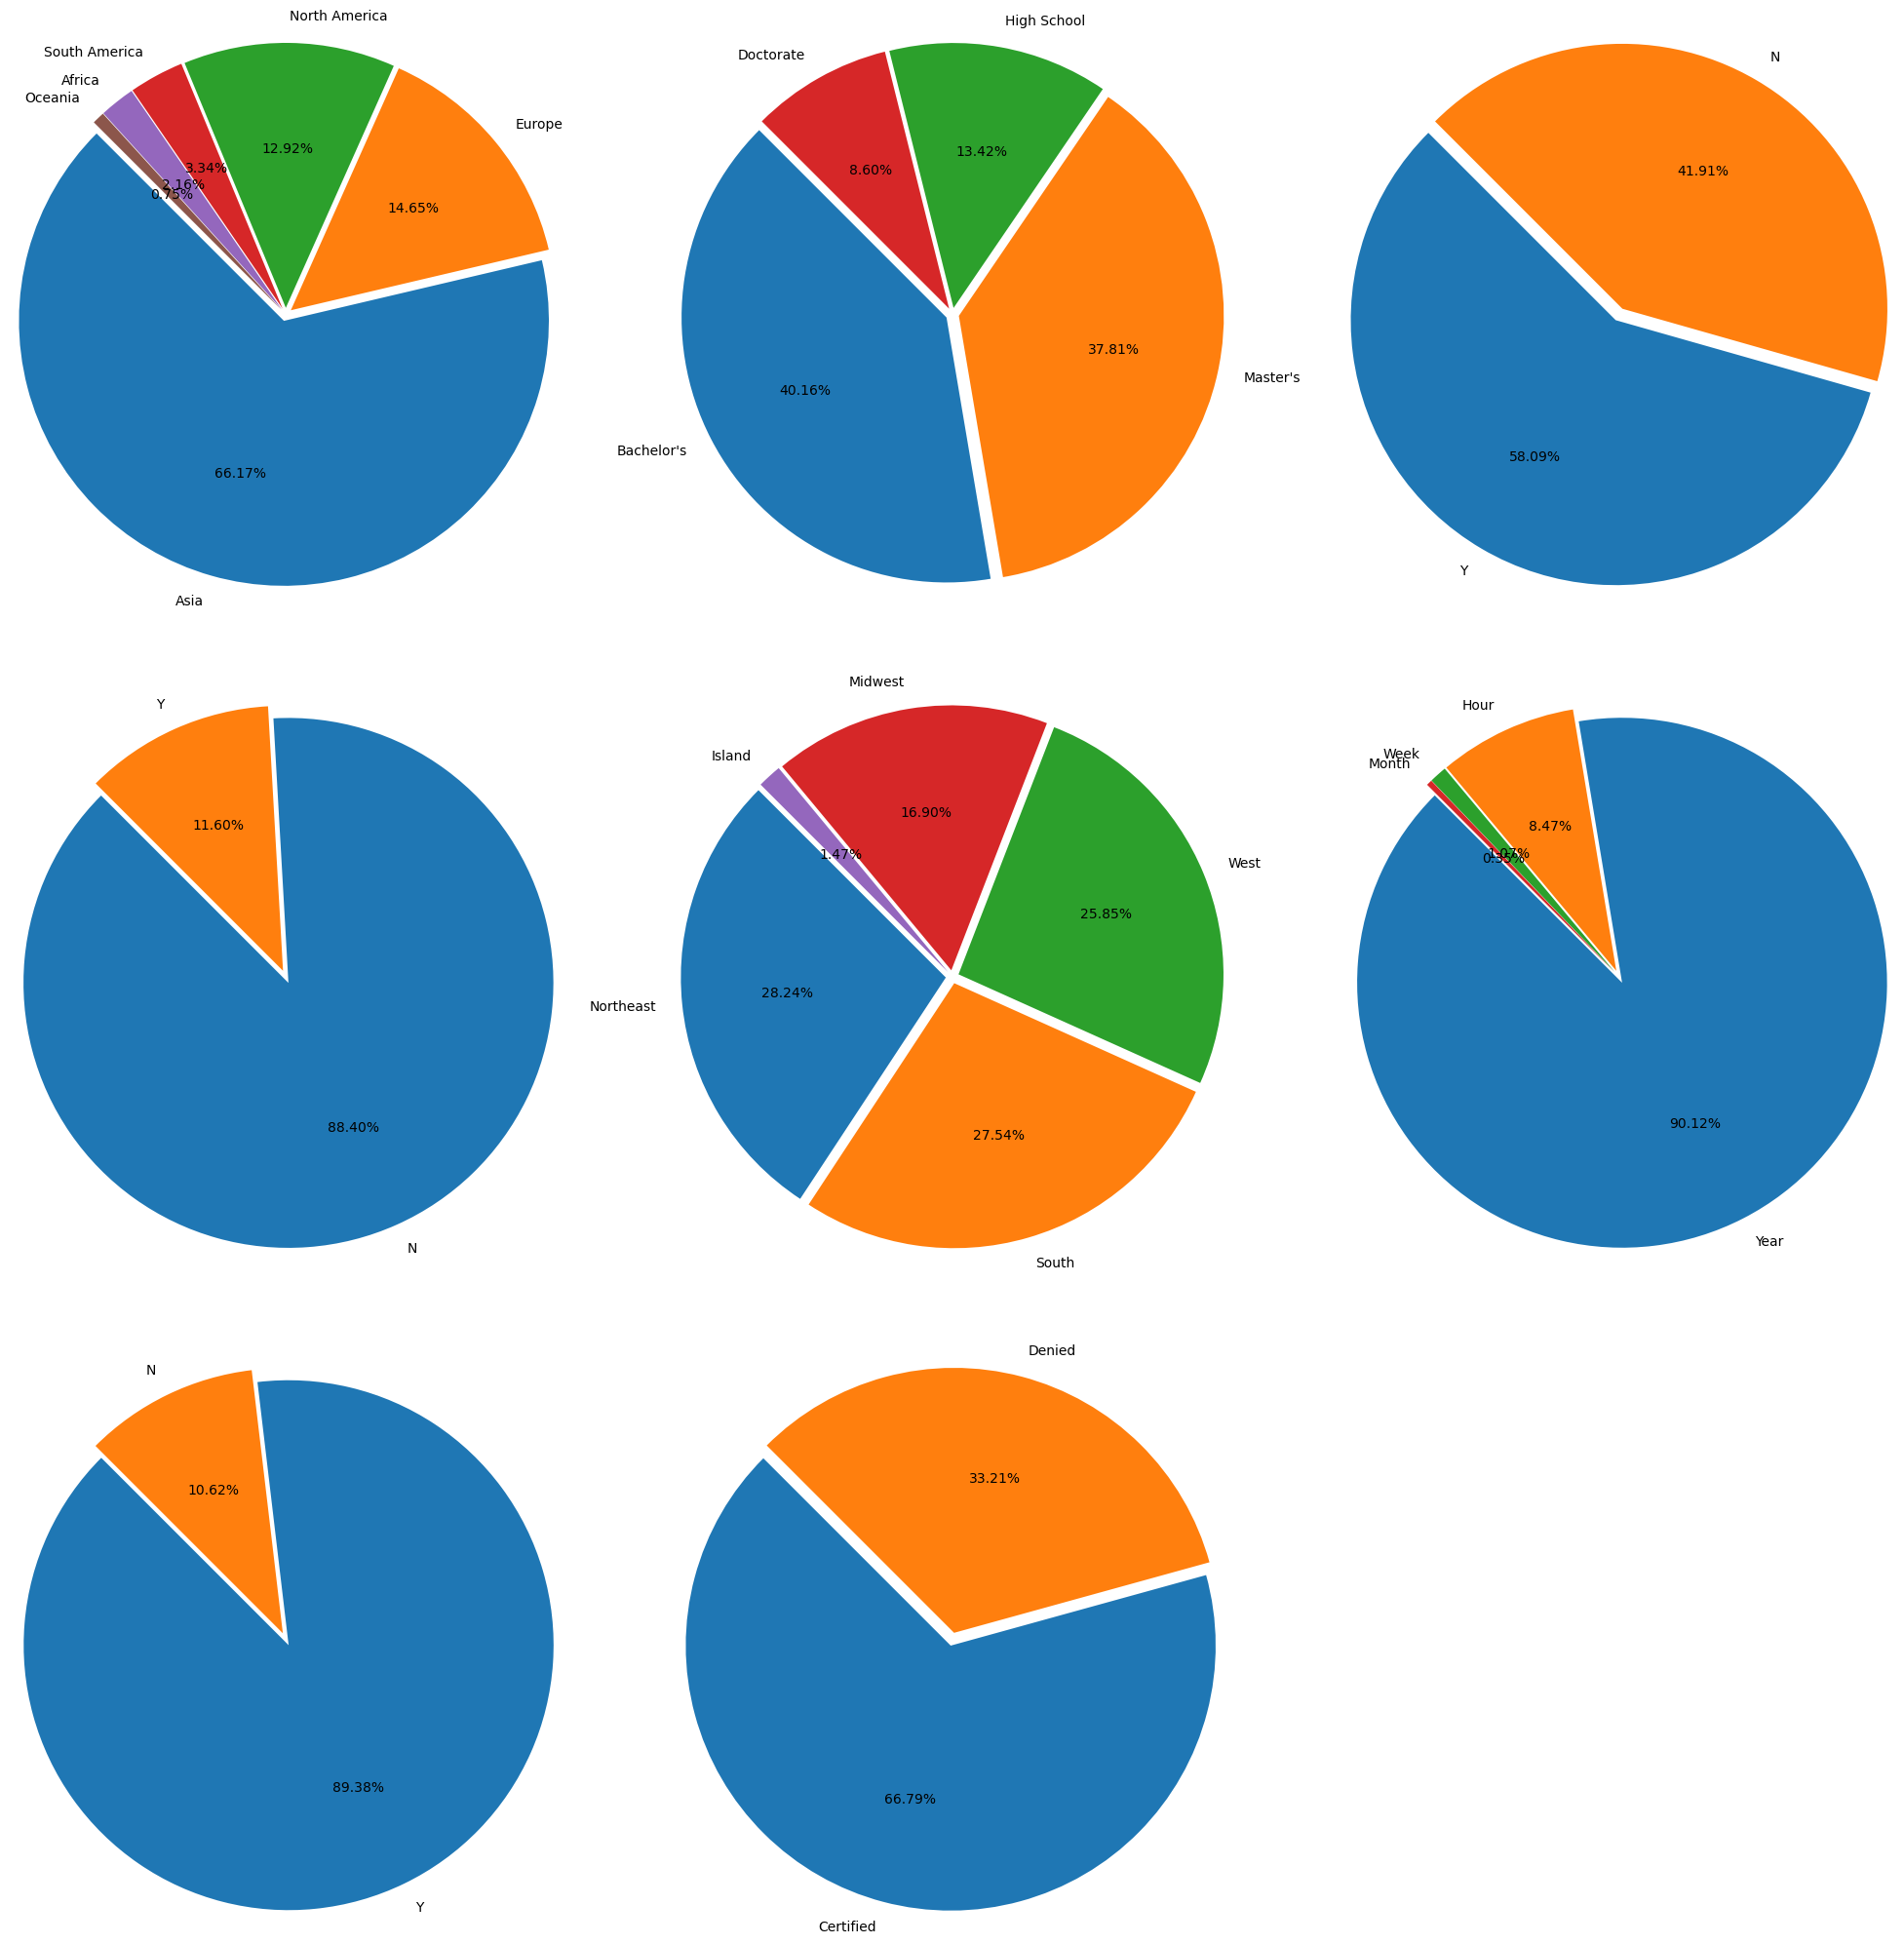

In [194]:
plt.figure(figsize = (25,25))
for i in range(1,len(cat_data)):
    keys = visa_df[cat_data[i]].value_counts().keys()
    value = visa_df[cat_data[i]].value_counts().values
    plt.subplot(3,3,i)
    plt.pie(value,
            labels = keys,
            explode = [0.03 for i in range(len(keys))],
            autopct = '%.2f%%',
            radius = 1.2,
            startangle = 135)